## Cat vs Dogs

Incarca imaginile
Imaginile sunt etichetate(labeled) catxxx.jpg si dogxxx.jpg

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#optine numele fisierelor in lista
from os import listdir
from os.path import isfile, join

mypath = "c:/Users/Harum/Documents/10/datasets/images/"
file_names = [ f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names))+ ' images loaded')



3000 images loaded


## Impartirea imaginilor incarcate in instuirea si test/validare a baze de date

De asemenea, trebuie sa le stocam etichetate(labels) (adica y_train si y_test)

Redimensionam imaginile pentru a mentine o dimensiune constanta de 150 x 150

Vom folisi 1000 de imagini cu caini si 1000 de imagini cu pisici ca date de instruire

Pentru testare/validare a setului de date vom folosi 500 din fiecare clasa

Cainii vor fi etichetati ca 1 si pisicile ca 0

Vom stoca imaginile noastra noi in urmatoarele directoare:
/datasets/catsvsdogs/train/dogs
/datasets/catsvsdogs/train/cats
/datasets/catsvsdogs/validation/dogs
/datasets/catsvsdogs/validation/cats


In [0]:
import cv2
import numpy as np
import sys
import os
import shutil 





#extrage 1000 pentru instruire si 500 pentru validarea 
dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
dog_dir_train = "c:/Users/Harum/Documents/10/datasets/catsvsdogs/train/dogs/"
cat_dir_train = "c:/Users/Harum/Documents/10/datasets/catsvsdogs/train/cats/"
dog_dir_val = "c:/Users/Harum/Documents/10/datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "c:/Users/Harum/Documents/10/datasets/catsvsdogs/validation/cats/"

#creaza foldare
def make_dir(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)


make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)


def getZeros(number):
    if(number > 10 and number <100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""


for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        print(image.shape ,str(" dog"))
        if dog_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image)
        if dog_count > training_size and dog_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        print(image.shape , str(' cat'))
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image)

    if dog_count == training_size+test_size and cat_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150, 150, 3)  dog
(150,

In [0]:
#Folosind functia savez de numpy pentru a stoca datele noastre incarcate ca fisiere NPZ
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))

In [0]:
#incarca functile

def load_data_training_and_test(datasetname):
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']

    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']

    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']

    npzfile = np.load(datasetname + '_test_labels.npz')
    test_labels = npzfile['arr_0']

    return(train, train_labels), (test, test_labels)







## Haide sa vedem cateva dintre imaginile incarcate




In [0]:
for i in range(1,11):
    random = np.random.randint(0, len(training_images))
    cv2.imshow("image_"+str(i), training_images[random])
    if training_labels[random] == 0 :
        print(str(i)+ " - Cat")
    else:
        print(str(i)+ " - Dog" )
    cv2.waitKey(0)
cv2.destroyAllWindows()

1 - Cat
2 - Dog
3 - Cat
4 - Cat
5 - Dog
6 - Cat
7 - Dog
8 - Cat
9 - Cat
10 - Cat





## Haideti sa pregatim datel in formatul asteptat de Keras
    *deasemenea respectam conventia de numire anterioara



In [0]:
(x_train, y_train), (x_test,y_test) = load_data_training_and_test("cats_vs_dogs")

#Remodelarea datelor de pe label(etichetare) de la (2000,) la (2000,1) si datele de testare del la (1000,) la (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

#schimba tipul de date a imagini catre float32
x_train= x_train.astype('float32')
x_test = x_test.astype('float32') 

#Normalizarea datelor prin schimbarea intevalului de la (0 la 255) la (0 la 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


## Sa cream un modelul  CNN simplu, similar cu cel folosit pentru CIFAR10

 *Exceptand acum folosim un sigmoid in loc de Softmax
 **Sigmoidele sunt utilizate atunci cand gacem o clasificare binara(adica doua clase)
 Note the binary_crossentropy loss

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

#creare model
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#compliel model
model.compile('rmsprop','binary_crossentropy', ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

## Instruirea modelului

In [0]:
history = model.fit(x_train, y_train,
                    batch_size,epochs,
                    validation_data=(x_test,y_test),
                    shuffle=True)

model.save("c:/Users/Harum/Documents/10/datasets/catsvsdogs/cats_vs_dogs_v1.h5")


#Evalueaza performanta modelului instruit
score =model.evaluate(x_test,y_test, verbose=1)
print("Test loss: ", score[0])
print("Test Accuracy", score[1])








Train on 2000 samples, validate on 1000 samples
Epoch 1/25
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7440 - accuracy: 0.5165 - val_loss: 0.6911 - val_accuracy: 0.5090
Epoch 2/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6865 - accuracy: 0.5790 - val_loss: 0.7280 - val_accuracy: 0.5150
Epoch 3/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6434 - accuracy: 0.6540 - val_loss: 0.7482 - val_accuracy: 0.5570
Epoch 4/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5865 - accuracy: 0.7025 - val_loss: 0.5644 - val_accuracy: 0.7200
Epoch 5/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5355 - accuracy: 0.7375 - val_loss: 0.6064 - val_accuracy: 0.7130
Epoch 6/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.7650 - val_loss: 0.5747 - val_accuracy: 0.7240
Epoch 7/25
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4416 - acc

## Testeaza Clasificatorul

In [0]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model("c:/Users/Harum/Documents/10/datasets/catsvsdogs/cats_vs_dogs_v1.h5")


def draw_test(name, pred, input_im):
    BLACK =[0,0,0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"

    expand_image = cv2.copyMakeBorder(input_im, 0,0,0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    #expand_image = cv2.cvtColor(expand_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expand_image, str(pred), (252,70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    cv2.imshow(name,expand_image)

for i in  range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Test Image", imageL)

    input_im = input_im.reshape(1, 150, 150, 3)

    #ia predictia
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Predication", res, imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()



Analiza
Rezultatele sunt rele dar puteau fi mai bune

## Acum sa instruim clasificatorul de pisici si caini folosind marirea datelor

In [0]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm


input_shape = (150, 150, 3)
img_width = 150
img_height = 150

np_train_samples = 2000
np_validation_samples = 1000
batch_size = 16
epochs = 25

train_data_dir = "c:/Users/Harum/Documents/10/datasets/catsvsdogs/train"
validation_data_dir = "c:/Users/Harum/Documents/10/datasets/catsvsdogs/validation"

#Crearea generatorului de date pentru datele de test
validation_datagen = ImageDataGenerator(
    #folosit pentru rescalarea valorilor pixelilor de la intervalul [0, 255] la [0,1]
    rescale= 1./255
)

#Crearea generatorului de date pentru datele de instruire
train_datagen = ImageDataGenerator(
    rescale=1./255,         #normalizarea valorilor pixelilor catre [0,1]
    rotation_range= 30,     #aleatoriu aplicam rotatii
    width_shift_range= 0.3, #aleatoriu aplicam schimbarea latimii
    height_shift_range=0.3, #aleatoriu aplicam schimbarea inaltimii
    horizontal_flip= True,  #intoarcere la intamplare a imagini
    fill_mode= 'nearest'    #utilizeaza modul de completare cel mai apropiat pentru a umple golurile create de cele de mai sus
)


#Specificati criterii despre datele de instruire, cum ar fi directorul, dimensiunea imagini, dimensiunea batch(lotului) si tipul 
#preia automat imaginile si clasele lor pentru seturi de instruire si validare
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= (img_width,img_height),
    batch_size=batch_size,
    class_mode= 'binary',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size= (img_width, img_height),
    batch_size=batch_size,
    class_mode= 'binary',
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Crem un model la fel cum am facut mai sus

In [0]:
#Creare model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile("rmsprop", 'binary_crossentropy', ['accuracy'])




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)       

In [0]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch= np_train_samples // batch_size,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps= np_validation_samples // batch_size
)

Epoch 1/25
125/125 [==============================] - 38s 304ms/step - loss: 0.7092 - accuracy: 0.4880 - val_loss: 0.6234 - val_accuracy: 0.4960
Epoch 2/25
125/125 [==============================] - 16s 124ms/step - loss: 0.6922 - accuracy: 0.5595 - val_loss: 0.6278 - val_accuracy: 0.5610
Epoch 3/25
125/125 [==============================] - 16s 132ms/step - loss: 0.6810 - accuracy: 0.5670 - val_loss: 0.7240 - val_accuracy: 0.5935
Epoch 4/25
125/125 [==============================] - 16s 129ms/step - loss: 0.6750 - accuracy: 0.5975 - val_loss: 0.6122 - val_accuracy: 0.5742
Epoch 5/25
125/125 [==============================] - 16s 129ms/step - loss: 0.6631 - accuracy: 0.6035 - val_loss: 0.7374 - val_accuracy: 0.6484
Epoch 6/25
125/125 [==============================] - 16s 129ms/step - loss: 0.6574 - accuracy: 0.6415 - val_loss: 0.6564 - val_accuracy: 0.6646
Epoch 7/25
125/125 [==============================] - 16s 129ms/step - loss: 0.6365 - accuracy: 0.6395 - val_loss: 0.2530 - val_ac

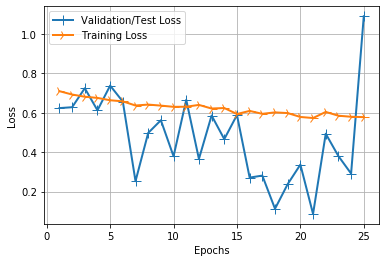

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot( epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label="Training Loss")
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




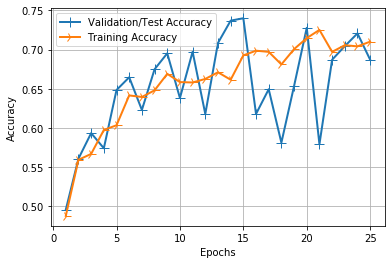

In [0]:

import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

line1 = plt.plot( epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label="Training Accuracy")
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()











